# Description

This notebook shows a way to solve an inverse problem parameterized with a single quantity.

# Load libraries

In [1]:
import numpy as np
import igl
import meshplot as mp
import time

import sys as _sys
_sys.path.append("../src_solution")
from elasticsolid import *
from elasticenergy import *
from stretch_utils import *
from matplotlib import gridspec
import matplotlib.pyplot as plt

shadingOptions = {
    "flat":True,
    "wireframe":False,   
}

rot = np.array(
    [[1, 0, 0 ],
     [0, 0, 1],
     [0, -1, 0 ]]
)

# Load mesh

We will use the ball for the current experiment.

In [2]:
v, _, _, t, _, _ = igl.read_obj("../data/ball.obj")

be = igl.edges(igl.boundary_facets(t))
bv = np.unique(igl.boundary_facets(t))
e  = igl.edges(t)

aabb = np.max(v, axis=0) - np.min(v, axis=0)
length_scale = np.mean(aabb)

# p = mp.plot(v @ rot.T, t, shading=shadingOptions)

# Linear/Non-Linear Elastic Solid

## Instantiation

We first specify the elasticity model to use for the elastic solid, as well as pinned vertices, and volumetric forces.

In [3]:
rho     = 131  # [kg.m-3]
young   = 7e5 # [Pa] 
poisson = 0.2
force_mass = np.zeros(shape = (3,))
force_mass[2] = - rho * 9.81

# Determines the pinned indices and the lowest pinned indext
maxZ    = np.max(v[:, 2])
pin_idx = np.arange(v.shape[0])[v[:, 2] > maxZ - 0.1*aabb[2]]
lowest_pin_idx = np.argsort(v[:, 2])[-pin_idx.shape[0]-1]

ee    = NeoHookeanElasticEnergy(young, poisson)
solid = ElasticSolid(v, t, ee, rho=rho, pin_idx=pin_idx, f_mass=force_mass)

## Manually search for a solution

In [4]:
n_search = 50
n_steps  = 20
thresh   = 1.

v_rest_init = v.copy()
v_rest_tmp  = v.copy()
v_target    = v.copy()[bv]

stretches = np.linspace(0.55, 1.1, n_search)

list_v_rest, list_v_eq, target_closeness = report_stretches(solid, v_rest_init, bv, v_target, stretches, lowest_pin_idx)


Energy: -1058.690041679392 Force residual norm: 2080.9797614012164 Line search Iters: 0
Energy: -1069.0920067187726 Force residual norm: 1016.8710826223586 Line search Iters: 0
Energy: -1087.3697064880591 Force residual norm: 504.3926409860975 Line search Iters: 0
Energy: -1091.3859263474978 Force residual norm: 232.10085084631675 Line search Iters: 0
Energy: -1092.438515487874 Force residual norm: 114.67423464964551 Line search Iters: 0
Energy: -1092.5619239560297 Force residual norm: 55.3129869122753 Line search Iters: 0
Energy: -1092.63737912519 Force residual norm: 26.626524109686358 Line search Iters: 0
Energy: -1092.64378711061 Force residual norm: 13.095078854988564 Line search Iters: 0
Energy: -1092.6459025605823 Force residual norm: 6.165057735882684 Line search Iters: 0
Energy: -1092.6467857659027 Force residual norm: 3.0099851979818304 Line search Iters: 0
Energy: -1092.646805703597 Force residual norm: 1.5035262458503162 Line search Iters: 0
Energy: -1092.6468369762008 Forc

Energy: -1637.6725207150162 Force residual norm: 6.406771910008617 Line search Iters: 0
Energy: -1637.674223786101 Force residual norm: 3.056319135665829 Line search Iters: 0
Energy: -1637.6742829718526 Force residual norm: 1.4338331139469676 Line search Iters: 0
Energy: -1637.6743114745727 Force residual norm: 0.6568378543897485 Line search Iters: 0
Energy: -1695.2789451724384 Force residual norm: 808.8917124405415 Line search Iters: 0
Energy: -1706.7707139771271 Force residual norm: 399.74920125696786 Line search Iters: 0
Energy: -1707.1645072619845 Force residual norm: 187.3443647268868 Line search Iters: 0
Energy: -1707.3131031891228 Force residual norm: 89.26380095821884 Line search Iters: 0
Energy: -1707.3880265412608 Force residual norm: 37.97812132683672 Line search Iters: 0
Energy: -1707.3960572503092 Force residual norm: 16.962412930582214 Line search Iters: 0
Energy: -1707.4007743685033 Force residual norm: 8.476532742478936 Line search Iters: 0
Energy: -1707.4031098612213 F

Energy: -2423.2802069561367 Force residual norm: 1.1539577506543575 Line search Iters: 0
Energy: -2423.280213754122 Force residual norm: 0.48468055263248694 Line search Iters: 0
Energy: -2500.8881637801414 Force residual norm: 767.87373234844 Line search Iters: 0
Energy: -2512.574064474975 Force residual norm: 307.6378613235663 Line search Iters: 0
Energy: -2512.8804080224954 Force residual norm: 132.39777577578766 Line search Iters: 0
Energy: -2512.9641321963827 Force residual norm: 66.02690909910228 Line search Iters: 0
Energy: -2512.9961218890044 Force residual norm: 29.76280699431708 Line search Iters: 0
Energy: -2513.001089165273 Force residual norm: 13.982309429574155 Line search Iters: 0
Energy: -2513.0049255288395 Force residual norm: 6.924450290269474 Line search Iters: 0
Energy: -2513.0065816629676 Force residual norm: 2.530853400964389 Line search Iters: 0
Energy: -2513.00660627052 Force residual norm: 1.2206113357878186 Line search Iters: 0
Energy: -2513.006615585072 Force 

Energy: -3418.116331026371 Force residual norm: 1.9240502504862393 Line search Iters: 0
Energy: -3418.116392700734 Force residual norm: 0.7775919571798772 Line search Iters: 0
Energy: -3527.074426930748 Force residual norm: 683.3116940824029 Line search Iters: 0
Energy: -3528.7812877970205 Force residual norm: 340.386342966465 Line search Iters: 0
Energy: -3529.5395086201374 Force residual norm: 168.00501956891682 Line search Iters: 0
Energy: -3529.8791363034807 Force residual norm: 82.0799189196955 Line search Iters: 0
Energy: -3529.904413123214 Force residual norm: 34.25905920077081 Line search Iters: 0
Energy: -3529.9118699676746 Force residual norm: 15.097598169862472 Line search Iters: 0
Energy: -3529.9169553926763 Force residual norm: 6.297658344521748 Line search Iters: 0
Energy: -3529.9170428517755 Force residual norm: 2.9044723634544787 Line search Iters: 0
Energy: -3529.917610924025 Force residual norm: 1.1392015726929015 Line search Iters: 0
Energy: -3529.9176219409287 Force

Energy: -4643.531574536215 Force residual norm: 3.7145212296870325 Line search Iters: 0
Energy: -4643.532037435459 Force residual norm: 1.7813150105194342 Line search Iters: 0
Energy: -4643.532054381794 Force residual norm: 0.8539828951991342 Line search Iters: 0
Energy: -4778.516672410021 Force residual norm: 558.0001317741671 Line search Iters: 0
Energy: -4779.270448470892 Force residual norm: 234.40969629273752 Line search Iters: 0
Energy: -4779.472949185133 Force residual norm: 103.7256492557061 Line search Iters: 0
Energy: -4779.604175851113 Force residual norm: 50.99527770750895 Line search Iters: 0
Energy: -4779.611817554571 Force residual norm: 25.131109310794937 Line search Iters: 0
Energy: -4779.616834525938 Force residual norm: 9.395333002965547 Line search Iters: 0
Energy: -4779.618783342632 Force residual norm: 3.5809840106795257 Line search Iters: 0
Energy: -4779.619123664939 Force residual norm: 1.7613690735128058 Line search Iters: 0
Energy: -4779.619192142816 Force res

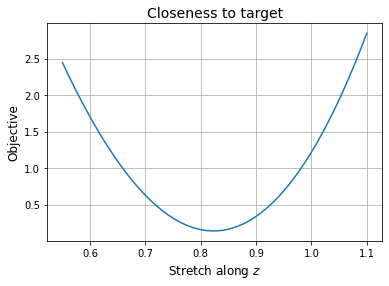

In [5]:
plt.plot(stretches, target_closeness)
plt.title("Closeness to target", fontsize=14)
plt.xlabel("Stretch along $z$", fontsize=12)
plt.ylabel("Objective", fontsize=12)
plt.grid()


# Plot best solution

In [6]:
min_stretch = stretches[np.argmin(target_closeness)]

stretch_diag = np.array([1., 1., min_stretch])
v_rest_opt  = list_v_rest[np.argmin(target_closeness)]
v_eq_opt    = list_v_eq[np.argmin(target_closeness)]

p = mp.plot(v_eq_opt @ rot.T, t, shading=shadingOptions)
p.add_points(v_eq_opt[solid.pin_idx, :] @ rot.T, shading={"point_color":"black", "point_size": 0.1 * length_scale})
p.add_edges(v_rest_opt @ rot.T, be, shading={"line_color": "blue"})
p.add_edges(v_target @ rot.T, be, shading={"line_color": "red"})

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0133619…

3